MODEL no.6:
Simple Regression Model using MNIST dataset.
Type: Multi-class Classification

Initialize Notebook

In [1]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-09-17 22:30:30.033136


1. Import libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0


2. Load MNIST dataset

In [3]:
from tensorflow.keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

3. Normalize data

In [4]:
train_data = train_data / 255.0
test_data = test_data / 255.0

3.1 Print dataset shapes

In [5]:
print(train_data.shape,
      train_labels.shape,
      test_data.shape,
      test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


3.2 Class names (digits)

In [6]:
class_names = [str(i) for i in range(10)]

3.3 Display sample images (of [0])

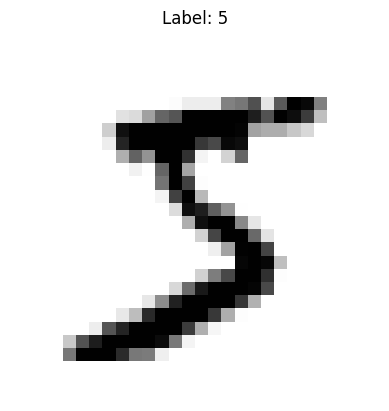

In [7]:
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.axis(False)
plt.show()

4. Building the Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   # flatten 28x28 → 784
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output layer (10 classes)
])

/opt/anaconda3/envs/MLenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5. Compile the model

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

6. Training the model

In [10]:
history = model.fit(
    train_data, train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(test_data, test_labels),
    verbose=1
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step - accuracy: 0.9243 - loss: 0.2602 - val_accuracy: 0.9621 - val_loss: 0.1311
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.9662 - loss: 0.1166 - val_accuracy: 0.9672 - val_loss: 0.1095
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9752 - loss: 0.0797 - val_accuracy: 0.9753 - val_loss: 0.0833
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9763 - val_loss: 0.0795
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9781 - val_loss: 0.0732
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - accuracy: 0.9882 - loss: 0.0375 - val_accuracy: 0.9784 - val_loss: 0.0703
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 843us/step - accuracy: 0.9907 - loss: 0.0292 - val_accuracy: 0.9761 - val_loss: 0.0826
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.9923 -

6.1 Visualize training data loss

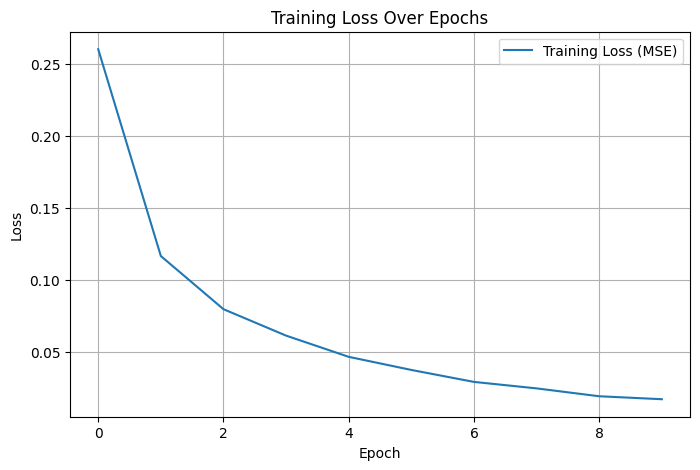

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label="Training Loss (MSE)")
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

7. Evaluate model

In [12]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9787


8. Generate predictions on an image.

In [13]:
pred_probs = model.predict(test_data[:1])
pred_label = np.argmax(pred_probs)
print(f"Predicted: {class_names[pred_label]}, True: {class_names[test_labels[0]]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted: 7, True: 7
